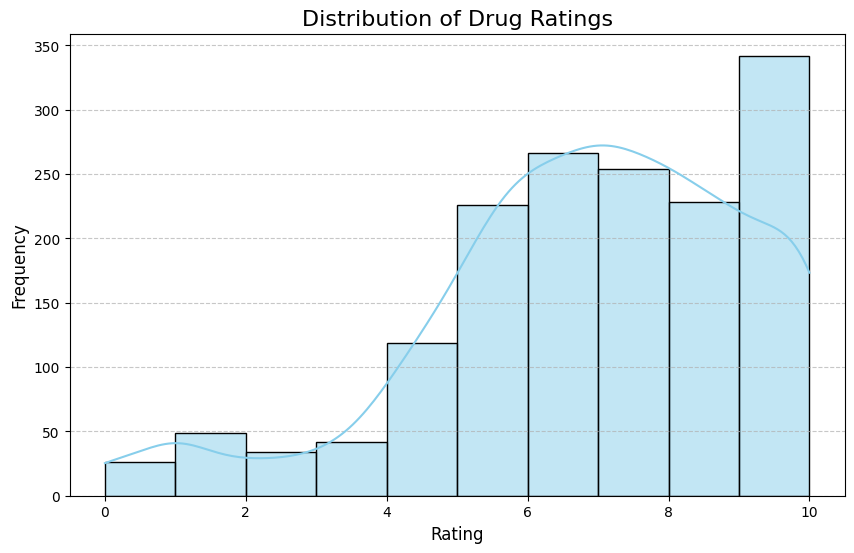

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

file_path = r'C:\Users\Sidharth\Downloads\drugs_side_effects_drugs_com.csv'
data = pd.read_csv(file_path)

cleaned_data = data.dropna(subset=["drug_name", "medical_condition", "rating"])
cleaned_data = cleaned_data.drop_duplicates()
cleaned_data["side_effects"] = cleaned_data["side_effects"].fillna("Not Reported")

plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data["rating"], bins=10, color="skyblue", edgecolor="black",kde=True)
plt.title("Distribution of Drug Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

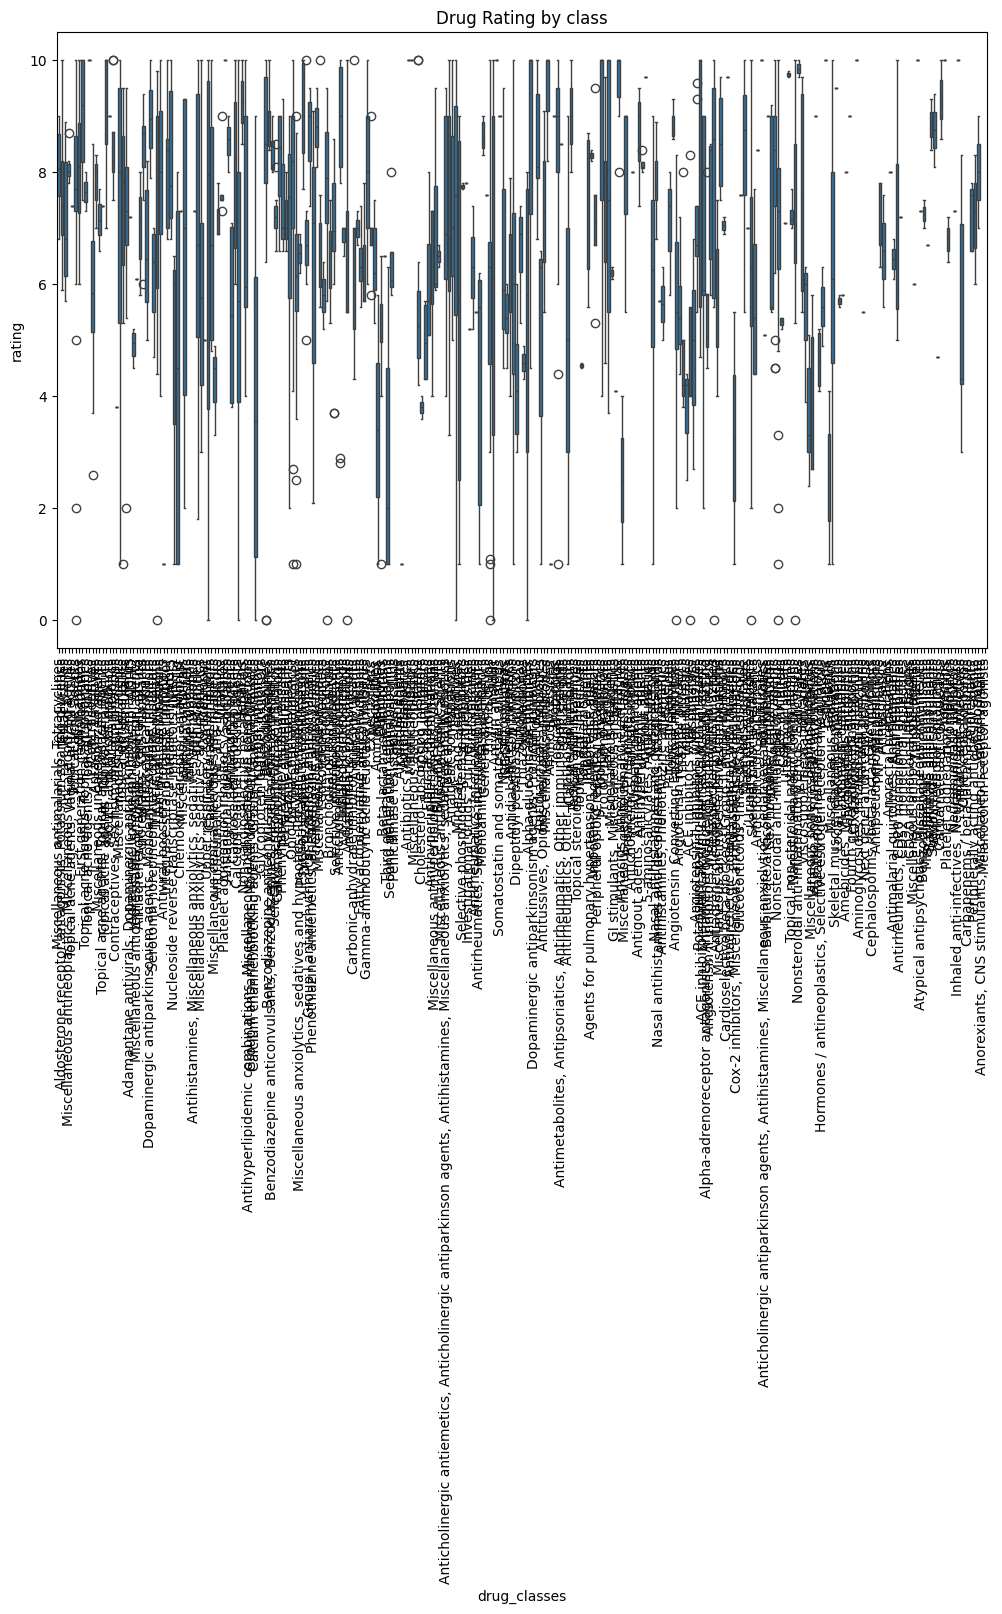

In [3]:
plt.figure(figsize=(12,8))
sns.boxplot(x='drug_classes',y='rating',data=data)
plt.xticks(rotation=90)
plt.title('Drug Rating by class')
plt.show()

In [19]:
top_drug=data.groupby('medical_condition')['drug_name'].value_counts().nlargest(10)
print(top_drug)

medical_condition  drug_name     
Acne               minocycline       2
Eczema             fluocinolone      2
Herpes             acyclovir         2
ADHD               Adderall          1
                   Adderall XR       1
                   Adhansia XR       1
                   Adzenys ER        1
                   Adzenys XR-ODT    1
                   Aptensio XR       1
                   Azstarys          1
Name: count, dtype: int64


In [20]:
top_conditions = cleaned_data["medical_condition"].value_counts()
selected_condition = top_conditions.idxmax()
print(top_conditions)

medical_condition
Hypertension            126
Acne                    120
Pain                     99
Diabetes (Type 2)        86
Osteoarthritis           69
AIDS/HIV                 65
Hayfever                 63
ADHD                     53
Insomnia                 51
Migraine                 51
Depression               47
Anxiety                  44
Bipolar Disorder         44
GERD (Heartburn)         44
Colds & Flu              42
Psoriasis                40
Diabetes (Type 1)        38
Eczema                   36
Bronchitis               34
Asthma                   33
Constipation             33
Osteoporosis             32
Seizures                 32
Cholesterol              30
Rheumatoid Arthritis     24
Angina                   20
UTI                      20
COPD                     20
Diarrhea                 20
Weight Loss              18
Incontinence             17
Covid 19                 16
Hypothyroidism           16
Erectile Dysfunction     13
Schizophrenia            13
Al

In [21]:
condition_data = cleaned_data[cleaned_data["medical_condition"] == selected_condition]

In [22]:
top_drugs = condition_data["drug_name"].value_counts().head(10)

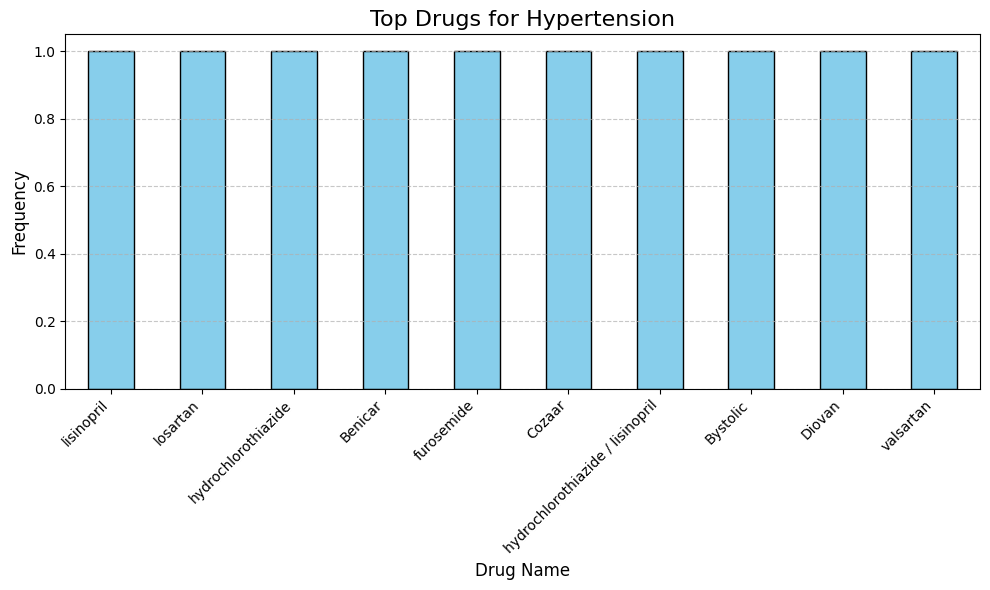

In [23]:
plt.figure(figsize=(10, 6))
top_drugs.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f"Top Drugs for {selected_condition}", fontsize=16)
plt.xlabel("Drug Name", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
side_effects_series = cleaned_data["side_effects"].str.split(", ")
all_side_effects = [effect for sublist in side_effects_series.dropna() for effect in sublist]

In [25]:
side_effect_counts = Counter(all_side_effects)
most_common_side_effects = side_effect_counts.most_common(10)

In [26]:
effects, counts = zip(*most_common_side_effects)

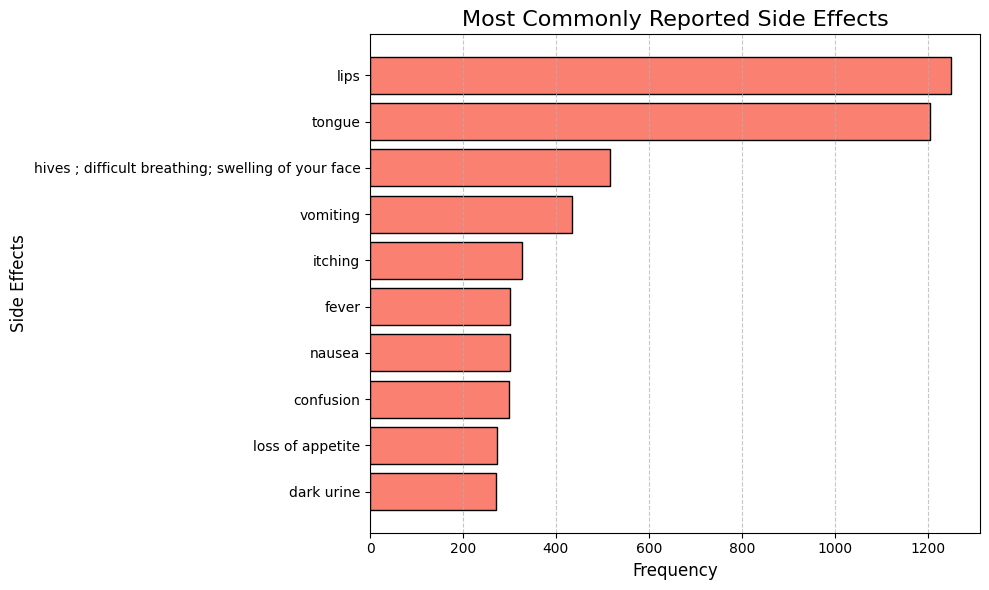

In [27]:
plt.figure(figsize=(10, 6))
plt.barh(effects, counts, color='salmon', edgecolor='black')
plt.title("Most Commonly Reported Side Effects", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Side Effects", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()